## Milestone Project
Practice with pandas and plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Exploratory analysis
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
print(data.shape)
data.head()
print(data.columns)

(450, 26)
Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')


In [3]:
# Get number of unique companies
companies = data.drop_duplicates(subset=['Company Name'], keep='first')
print(companies.shape)
companies = companies.dropna(subset=['Company Name'])
rows, cols = companies.shape
print(f'Number of unique companies: {rows}')
companies.head()

(439, 26)
Number of unique companies: 439


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [8]:
# Get number of jobs created in Queens
queens = data[data['Borough'].str.contains('Queens', case=False, regex=True)]
print(queens.shape)
jobs_queens = int(queens['Job created'].sum())
print(f'Total jobs created for businesses in Queens: {jobs_queens}')

(173, 26)
Total jobs created for businesses in Queens: 102


In [14]:
# Get number of unique email domains
domain = data.dropna(subset='company email')
string = domain['company email'].str.split('@', expand=True)
domain['domain'] = string[1]
rows, cols = domain.shape
print(f'Total email domains: {rows}')
domain = domain.drop_duplicates(subset='domain', keep='first')
rows, cols = domain.shape
print(f'Number of unique email domains: {rows}')
domain.head()

Total email domains: 433
Number of unique email domains: 357


/var/folders/td/whkqptr93_548n73ypb7kbpm0000gn/T/ipykernel_67354/2382015054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain['domain'] = string[1]


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,domain
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,energyspec.com
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,industrycity.com
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,silvprop.com
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,...,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth,dial7.com
7,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,...,Staten Island,40.633153,-74.150999,501.0,49.0,239.0,5146740.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...,gmail.com


In [51]:
# Get average total savings and total jobs created
nta = data.groupby(['NTA'])[['Total Savings', 'Job created']].agg(
    ('count', 'mean', 'sum'))
rows, cols = nta.shape
print(f'Total NTAs: {rows}')
nta.head()

Total NTAs: 79


Total Savings                             \
                                          count           mean         sum   
NTA                                                                          
Astoria                                       3   11409.986667    34229.96   
Baisley Park                                  1   21522.740000    21522.74   
Battery Park City-Lower Manhattan             9  469890.796667  4229017.17   
Bedford                                       3   62113.343333   186340.03   
Bensonhurst West                              1    -379.470000     -379.47   

                                  Job created            
                                        count mean  sum  
NTA                                                      
Astoria                                     0  NaN  0.0  
Baisley Park                                0  NaN  0.0  
Battery Park City-Lower Manhattan           0  NaN  0.0  
Bedford                                     0  NaN  0.0  
Bensonhurst West                            0  NaN  0.0

In [21]:
# Get NTAs with at least 5 businesses
mask = nta[('Total Savings', 'count')] >= 5
nta_subset = nta[mask]
print(nta_subset.shape)
nta_subset.head()

(20, 6)


Total Savings                 \
                                                 count           mean   
NTA                                                                     
Battery Park City-Lower Manhattan                    9  469890.796667   
Bushwick South                                      10   26140.455000   
Carroll Gardens-Columbia Street-Red Hook            11   24337.390000   
College Point                                        7   17159.372857   
Crown Heights North                                  9    4036.298889   

                                                     Job created              
                                                 sum       count  mean   sum  
NTA                                                                           
Battery Park City-Lower Manhattan         4229017.17           0   NaN   0.0  
Bushwick South                             261404.55           1  10.0  10.0  
Carroll Gardens-Columbia Street-Red Hook   267711.29           0   NaN   0.0  
College Point                              120115.61           1   2.0   2.0  
Crown Heights North                         36326.69           0   NaN   0.0

In [47]:
# Export results to csv
nta_export = pd.DataFrame()
nta_export['Average Total Savings'] = nta_subset.loc[:,('Total Savings', 'mean')]
nta_export['Total Jobs Created'] = nta_subset.loc[:,('Job created', 'sum')]
nta_export = nta_export.round({'Average Total Savings': 2})
nta_export = nta_export.round({'Total Jobs Created': 0})
nta_export.to_csv('nta_summary.csv', index=True)
nta_export.head()

,Average Total Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.80,0.0
Bushwick South,26140.46,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.39,0.0
College Point,17159.37,2.0
Crown Heights North,4036.30,0.0


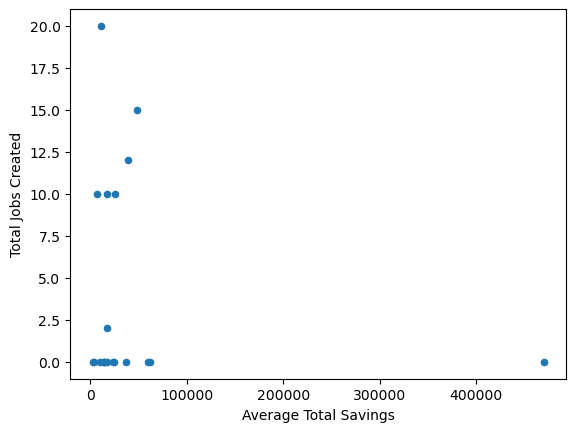

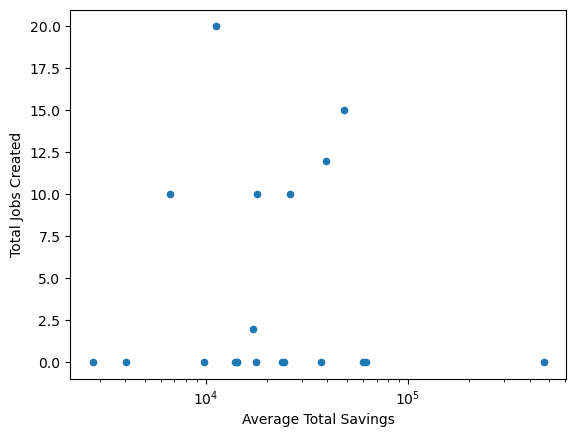

In [48]:
# Plot jobs created vs. average savings
nta_export.plot(x='Average Total Savings', y='Total Jobs Created', kind='scatter')
plt.show()
nta_export.plot(x='Average Total Savings', y='Total Jobs Created', kind='scatter')
plt.xscale('log')
plt.show()

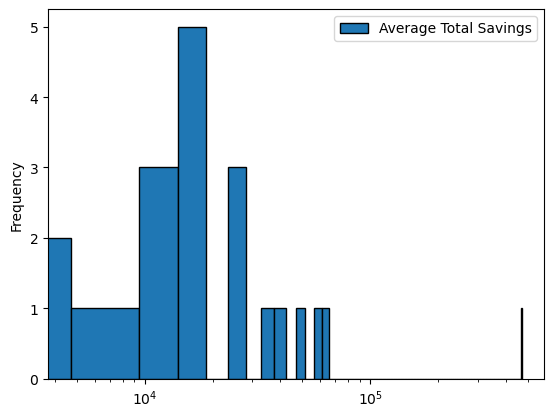

In [49]:
# Plot histogram of average total savings
nta_export.plot.hist(column=['Average Total Savings'], bins=100, edgecolor='black')
plt.xscale('log')
plt.show()

In [66]:
# Get total jobs created each month
jobs = data[['Effective Date', 'Job created']]
jobs.index = pd.to_datetime(jobs['Effective Date'])
jobs = jobs.groupby(pd.Grouper(freq='M')).sum(numeric_only=True)
print(jobs.shape)
jobs.head(10)

(330, 1)


,Job created
Effective Date,
1993-02-28,15.0
1993-03-31,0.0
1993-04-30,0.0
1993-05-31,0.0
1993-06-30,0.0
1993-07-31,0.0
1993-08-31,0.0
1993-09-30,0.0
1993-10-31,0.0


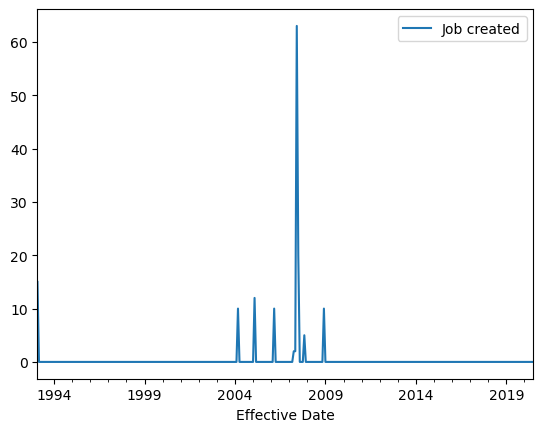

In [67]:
# Plot total jobs created each month
jobs.plot()
plt.show()